In [1]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy

In [123]:
import pandas as pd
df = pd.read_csv('C:/Users/user/Desktop/eeg/all_test_feature4.csv')
df['relax'] = df['after'] - df['before']
df['relax'] = df['relax'].apply(lambda x:x+1)

In [ ]:
extra_index = [x for x in df2.columns if 'index' in x][1:]
df = df.drop(extra_index,axis=1)

In [124]:
id = pd.get_dummies(df['id']) 
light = pd.get_dummies(df['light'])
music = pd.get_dummies(df['music'])
df = pd.concat([df,light,music,id], axis=1).drop(['id','f','light','bright','music','bgm4','date'],axis=1)
df['after'] = df['after'].apply(lambda x:x-1 if x==5 else x)
df['after'] = df['after'].apply(lambda x:x-2)

isnull = pd.DataFrame(df.isnull().sum())
for i in isnull[isnull[0]>0].index:
    df[i] = df[i].fillna(df[i].mean())

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# X = df.drop(['after'],axis=1).values
# y = df['after'].values
X = df.drop(['relax'],axis=1).values
y = df['relax'].values
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=1, stratify=y)

#### random forest

fold 1
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       167
           1       0.92      1.00      0.96      1508
           2       0.99      0.65      0.78       288

    accuracy                           0.93      1963
   macro avg       0.97      0.83      0.88      1963
weighted avg       0.94      0.93      0.93      1963



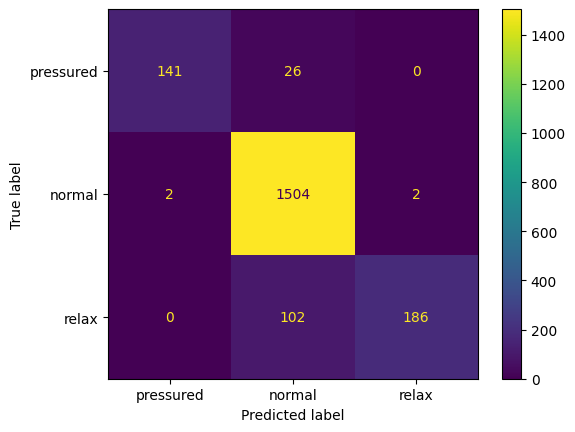

fold 2
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       152
           1       0.93      0.99      0.96      1526
           2       0.99      0.71      0.83       285

    accuracy                           0.94      1963
   macro avg       0.95      0.85      0.89      1963
weighted avg       0.94      0.94      0.94      1963



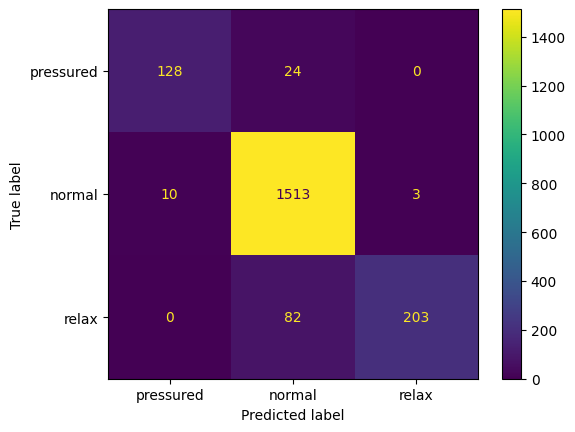

fold 3
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       165
           1       0.94      0.99      0.97      1546
           2       0.98      0.76      0.85       252

    accuracy                           0.94      1963
   macro avg       0.95      0.84      0.89      1963
weighted avg       0.95      0.94      0.94      1963



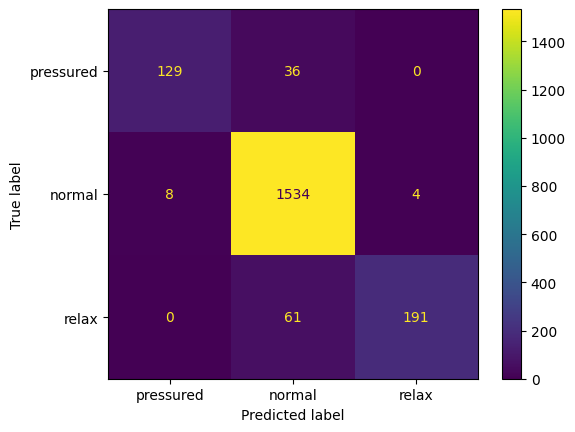

fold 4
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       162
           1       0.92      0.99      0.96      1543
           2       0.95      0.64      0.76       258

    accuracy                           0.93      1963
   macro avg       0.94      0.81      0.86      1963
weighted avg       0.93      0.93      0.92      1963



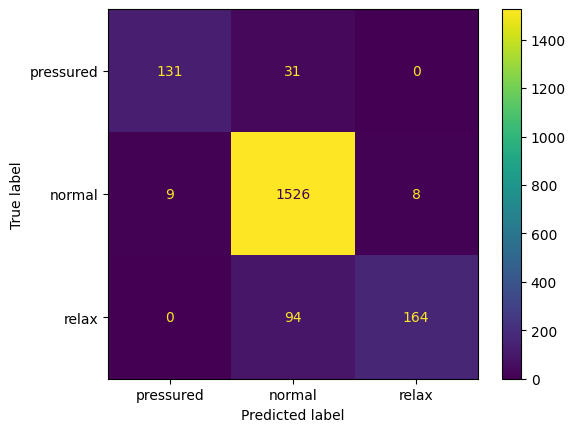

fold 5
              precision    recall  f1-score   support

           0       0.99      0.80      0.89       159
           1       0.92      1.00      0.95      1509
           2       0.98      0.64      0.78       295

    accuracy                           0.93      1963
   macro avg       0.96      0.81      0.87      1963
weighted avg       0.93      0.93      0.92      1963



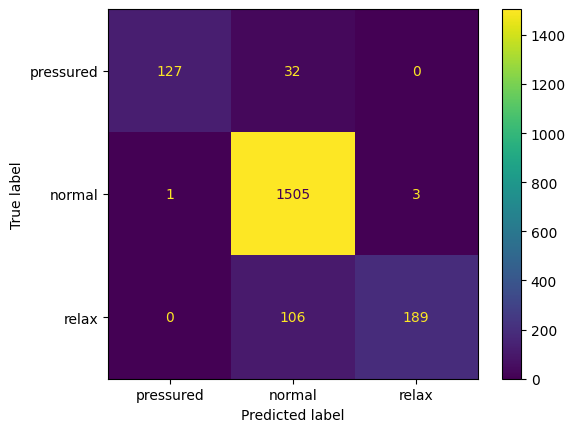

In [126]:
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for i, (train_index, test_index) in enumerate(ss.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train,y_test = y[train_index], y[test_index]
    
    forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)
    forest.fit(X_train,y_train)
    predicted = forest.predict(X_test)
    print('fold '+str(i+1))
    print('=========================================================================================')
    print(classification_report(y_test, predicted))

    confusion_matrix = metrics.confusion_matrix(y_test, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = ['pressured', 'normal','relax'])
    cm_display.plot()
    plt.show()
    print('=========================================================================================')

In [127]:
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

important_feature = []
for i, (train_index, test_index) in enumerate(ss.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train,y_test = y[train_index], y[test_index]
    
    forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)
    forest.fit(X_train,y_train)

    model_important = []
    sorted_idx = forest.feature_importances_.argsort()
    top50 = sorted_idx[-50:]
    # print(top20)
    model_important.append(top50)
    important_feature.append(model_important)

In [130]:
index_set = []
for i in range(len(important_feature)):
    index_set.append(set(important_feature[i][0]))
forest_important = set.intersection(*index_set)
print(forest_important)

{448, 259, 170, 171, 430, 466, 532, 534, 599, 86, 702}


In [131]:
a = []
for i in forest_important:
    # print(df.drop(['after'],axis=1).columns[i])
    a.append(df.drop(['after'],axis=1).columns[i])

In [132]:
print(a)

['fft_above_mean_aisle2_beta', 'fft_IQR_aisle1_alpha', 'before', 'mean_aisle1_alpha', 'fft_above_mean_aisle1_beta', 'fft_above_mean_aisle3_beta', 'range_aisle2_gamma', 'mad_aisle2_gamma', 'fft_IQR_aisle1_gamma', 'fft_mid_aisle1', 'range_aisle2_delta']


#### xgboost

fold 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00      1508
           2       1.00      1.00      1.00       288

    accuracy                           1.00      1963
   macro avg       1.00      1.00      1.00      1963
weighted avg       1.00      1.00      1.00      1963



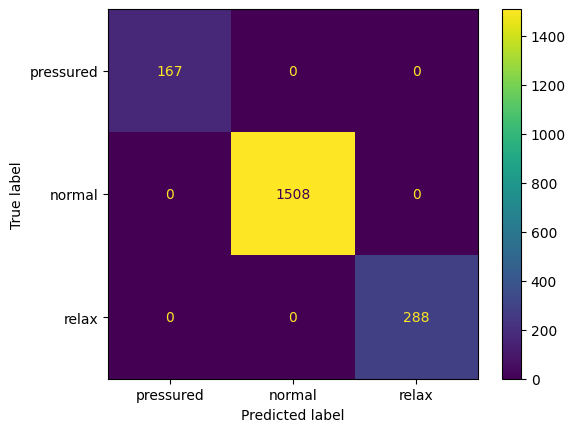

fold 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00      1526
           2       1.00      1.00      1.00       285

    accuracy                           1.00      1963
   macro avg       1.00      1.00      1.00      1963
weighted avg       1.00      1.00      1.00      1963



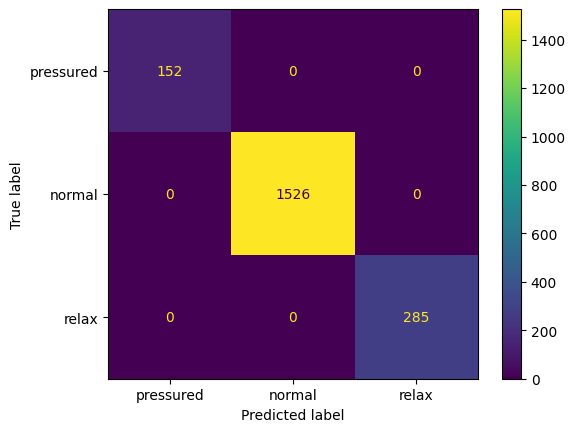

fold 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00      1546
           2       1.00      1.00      1.00       252

    accuracy                           1.00      1963
   macro avg       1.00      1.00      1.00      1963
weighted avg       1.00      1.00      1.00      1963



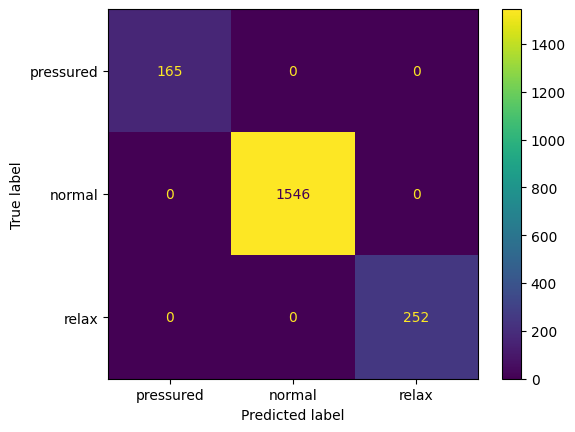

fold 4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00      1543
           2       1.00      1.00      1.00       258

    accuracy                           1.00      1963
   macro avg       1.00      1.00      1.00      1963
weighted avg       1.00      1.00      1.00      1963



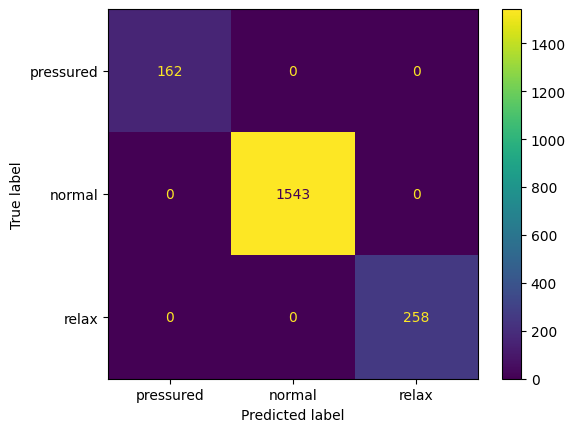

fold 5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00      1509
           2       1.00      1.00      1.00       295

    accuracy                           1.00      1963
   macro avg       1.00      1.00      1.00      1963
weighted avg       1.00      1.00      1.00      1963



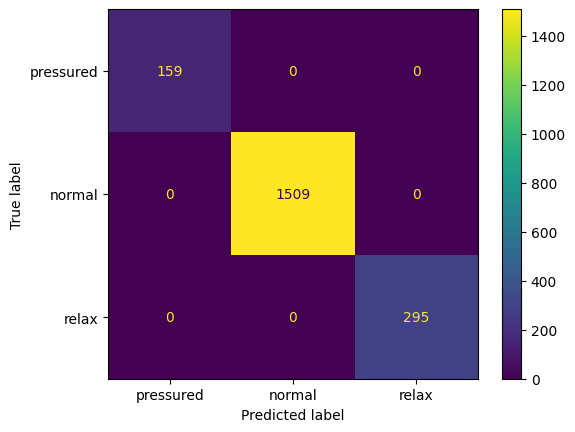

In [133]:
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for i, (train_index, test_index) in enumerate(ss.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train,y_test = y[train_index], y[test_index]
    
    xgb = XGBClassifier(n_estimators=100, learning_rate= 0.3)
    xgb.fit(X_train, y_train)
    predicted = xgb.predict(X_test)
    print('fold '+str(i+1))
    print('=========================================================================================')
    print(classification_report(y_test, predicted))

    confusion_matrix = metrics.confusion_matrix(y_test, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels = ['pressured', 'normal','relax'])
    cm_display.plot()
    plt.show()
    print('=========================================================================================')

In [134]:
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

important_feature = []
for i, (train_index, test_index) in enumerate(ss.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train,y_test = y[train_index], y[test_index]
    
    xgb = XGBClassifier(n_estimators=100, learning_rate= 0.3)
    xgb.fit(X_train, y_train)

    model_important = []
    sorted_idx = xgb.feature_importances_.argsort()
    top50 = sorted_idx[-50:]
    # print(top20)
    model_important.append(top50)
    important_feature.append(model_important)

In [135]:
index_set = []
for i in range(len(important_feature)):
    index_set.append(set(important_feature[i][0]))

xgb_important = set.intersection(*index_set)
print(xgb_important)

{1025, 3, 16, 22, 31, 32, 33, 35, 36, 170, 171, 45, 47, 67, 69, 84, 86, 104, 117, 122, 1022, 1023}


In [136]:
xgb_important & forest_important

{86, 170, 171}

In [137]:
a = []
for i in xgb_important:
    # print(df.drop(['after'],axis=1).columns[i])
    a.append(df.drop(['after'],axis=1).columns[i])
print(a)

['p', 'min_aisle1', 'mean_aisle2', 'mid_aisle2', 'energy_aisle2', 'mean_aisle3', 'std_aisle3', 'min_aisle3', 'max_aisle3', 'before', 'mean_aisle1_alpha', 'skewness_aisle3', 'energy_aisle3', 'min_aisle5', 'range_aisle5', 'fft_max_aisle1', 'fft_mid_aisle1', 'fft_mid_aisle2', 'fft_std_aisle3', 'fft_mid_aisle3', 'dark', 'bgm3']


In [138]:
for i in xgb_important & forest_important:
    print(df.drop(['after'],axis=1).columns[i])

before
mean_aisle1_alpha
fft_mid_aisle1
